# Plot downsampled Ancients
Take the high-coverage Ancients, and plot results from their downampled Versions
1. Ancient SA: Are prepared in ./PrepareData/prepare_SA_readcount.ipynb and then run via ./ParallelRuns/parallel_AS_hdf5_callroh.ipynb

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os  # For Saving to Folder
import pandas as pd
from matplotlib import gridspec

##############################
import socket
import os as os
import sys as sys
import multiprocessing as mp

socket_name = socket.gethostname()
print(socket_name)
if socket_name == "VioletQueen":
    path = "/home/harald/git/HAPSBURG/"   # The Path on Harald's machine
elif socket_name.startswith("midway2"):
    print("Midway jnovmbre partition detected.")
    path = "/project2/jnovembre/hringbauer/HAPSBURG/"  # The Path on Midway Cluster
else: 
    raise RuntimeWarning("Not compatible machine. Check!!")
    
os.chdir(path)  # Set the right Path (in line with Atom default)
print(os.getcwd()) # Show the current working directory. Should be HAPSBURG/Notebooks/ParallelRuns
print(f"CPU Count: {mp.cpu_count()}")

sys.path.append("./PackagesSupport/")
from pp_individual_roh_csvs import create_combined_ROH_df

midway2-0406.rcc.local
Midway jnovmbre partition detected.
/project2/jnovembre/hringbauer/HAPSBURG
CPU Count: 28


## Prepare Data

### Ancient South Americans: Take example IPK12

### Load downsampled Inference

In [6]:
base_path = "./Empirical/1240k/SA_Readcounts/Downsample_Loschbour/"
iid = "Loschbour"   ###['IPY10', 'IPK12', 'MA577', '894', '895']
suffix = "_roh_full.csv"
#down_sampling_covs = np.geomspace(0.04, 1.0, 10)[:]  # Modify depending on how much Coverage has been loaded
cms = [4, 8, 12]
gap = 0.3

samples = np.array([iid + f"{c:.4f}" for c in down_sampling_covs])   # Numpy Array for better slicing
paths = [os.path.join(base_path, s[:10] + suffix) for s in samples]

df_ipk12s = [] # For each cM cutoff one df

df_t = create_combined_ROH_df(paths, samples, pops=samples, min_cm=cms, snp_cm=50, gap=gap, output=False)[["sum_roh",]]
df_t["mean_cov"] = down_sampling_covs * 10.439
df_t[">cm"]=cm
#df_ipk12s.append(df_t)
#df_ipk12 = pd.concat(df_ipk12s)  # Combine all Dataframes into one (can be decomposed later)

KeyError: "['sum_roh'] not in index"

### Load downsampled Pseudohaploid
Todo: Refactor with above cell into Function

In [2]:
base_path = "./Empirical/1240k/SA_Readcounts/Downsample_IPK12/"  # should actually be _ph but WHOOPSIEDAISY happened
iid = "IPK12"   ###['IPY10', 'IPK12', 'MA577', '894', '895']
suffix = "_roh_full.csv"
down_sampling_covs = np.linspace(0.3, 1.0, 8)
cms = [4, 8, 12]
gap = 0.3
samples = np.array([iid + f"{c:.3f}" for c in down_sampling_covs])   # Numpy Array for better slicing
paths = [os.path.join(base_path, s[:10] + suffix) for s in samples]  # 10 as s10 was used

df_ipk12s_ph = [] # For each cM cutoff one df
for cm in cms:
    df_t = create_combined_ROH_df(paths, samples, pops=samples, min_cm=cm, snp_cm=50, gap=gap, output=False)[["sum_roh",]]
    df_t["mean_cov"] = down_sampling_covs # 1114250 1240k SNPs covered 
    df_t[">cm"]=cm
    df_ipk12s_ph.append(df_t)
df_ipk12_ph = pd.concat(df_ipk12s_ph)  # Combine all Dataframes into one (can be decomposed later)

TypeError: object of type 'int' has no len()

### Load the Pseudohaploid Sum ROH From Reich
Kind of legacy - but still interesting as it would allow plotting from the Reich Side of Things

In [88]:
paths = ["./Empirical/Eigenstrat/Reichall/IPK12.SG_roh_full.csv",]
cms = [4, 8, 12]
iids=np.array(["IPK12,"])
sum_rohs_IPK12 = [create_combined_ROH_df(paths, iids, iids, min_cm=cm, snp_cm=50, gap=gap, output=False)["sum_roh"].values[0] for cm in cms]

## Create the Figure with loaded Data

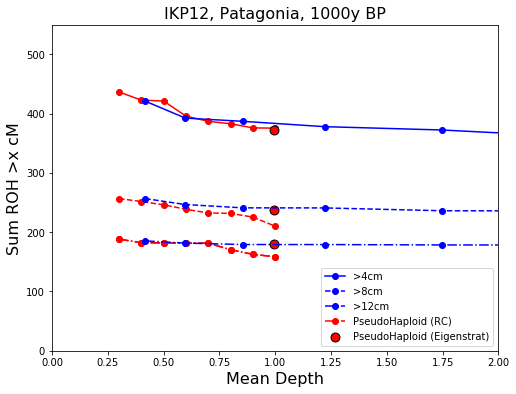

In [92]:
#def plot_downsample_fig(df1):
fs=16
fs_leg=10
mss = ["bo-", "bo--", "bo-."]

plt.figure(figsize=(8, 6))

### IPK12
for i, cm in enumerate(cms):
    ### Plot the RC Line for cm
    df_plot = df_ipk12[df_ipk12[">cm"]==cm]
    plt.plot(df_plot["mean_cov"], df_plot["sum_roh"], mss[i], label=f">{cm}cm", lw=1.5, ms=6, zorder=1, color="b")
    
    ### Plot PH Line for cm
    df_plot = df_ipk12_ph[df_ipk12_ph[">cm"]==cm]
    plt.plot(df_plot["mean_cov"], df_plot["sum_roh"], mss[i], lw=1.5, ms=6, zorder=0, color="r")

plt.plot(df_plot["mean_cov"], df_plot["sum_roh"], mss[i], lw=1.5, ms=6, zorder=0, color="r", label="PseudoHaploid (RC)")        

plt.scatter(np.ones(len(cms)) * 88491 / 89050, sum_rohs_IPK12, c="r", s=80, ec="k", label="PseudoHaploid (Eigenstrat)", zorder=1)
    
plt.legend(loc="lower right", fontsize=fs_leg)
plt.ylim([0, 550])

plt.ylabel("Sum ROH >x cM", fontsize=fs)
plt.xlabel("Mean Depth", fontsize=fs)
plt.title("IKP12, Patagonia, 1000y BP", fontsize=fs)
#plt.xscale("log")
plt.xlim([0,2])
plt.show()

# Area 51

In [1]:
### Nr SNPs missing Chromosome 1 between ES and the full IPK12 RC data 
88491 / 89050

0.9937226277372263